In [1]:
# Homework 04 
# Yash Kosambia 
# cwid 10475286

In [2]:
import numpy as np 
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [3]:
baseball = pd.read_csv('baseball_100.csv')
baseball

,firstname,lastname,age,team,games,at_bats,runs,hits,doubles,triples,homeruns,RBIs,walks,strikeouts,bat_ave,on_base_pct,slugging_pct,stolen_bases,caught_stealing
0,Alfonso,Soriano,24,NYY,156,696,128,209,51,2,39,102,23,157,0.300,0.332,0.547,41,13
1,Miguel,Tejada,26,OAK,162,662,108,204,30,0,34,131,38,84,0.308,0.354,0.508,7,2
2,*Ichiro,Suzuki,28,SEA,157,647,111,208,27,8,8,51,68,62,0.321,0.388,0.425,31,15
3,Derek,Jeter,28,NYY,157,644,124,191,26,0,18,75,73,114,0.297,0.373,0.421,32,3
4,*Garret,Anderson,30,ANA,158,638,93,195,56,3,29,123,30,80,0.306,0.332,0.539,6,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,#D'Ange,Jimenez,24,CHW,27,108,22,31,4,3,1,11,16,10,0.287,0.384,0.407,2,1
205,#Jose,Macias,30,DET,33,107,10,25,4,0,0,6,8,13,0.234,0.291,0.271,3,2
206,#Enriqu,Wilson,28,NYY,60,105,17,19,2,2,2,11,8,22,0.181,0.239,0.295,1,1
207,Josh,Paul,27,CHW,33,104,11,25,4,0,0,11,9,22,0.240,0.302,0.279,2,0


In [4]:
features = baseball.columns
print(features)

Index(['firstname', 'lastname', 'age', 'team', 'games', 'at_bats', 'runs',
       'hits', 'doubles', 'triples', 'homeruns', 'RBIs', 'walks', 'strikeouts',
       'bat_ave', 'on_base_pct', 'slugging_pct', 'stolen_bases',
       'caught_stealing'],
      dtype='object')


In [5]:
pd.crosstab(index=baseball['homeruns'], columns='count')

col_0,count
homeruns,
0,8
1,11
2,11
3,13
4,19
5,9
6,16
7,15
8,11


In [6]:
x=baseball[['firstname', 'lastname', 'age', 'team', 'games', 'at_bats', 'runs',
       'hits', 'doubles', 'triples', 'RBIs', 'walks', 'strikeouts',
       'bat_ave', 'on_base_pct', 'slugging_pct', 'stolen_bases',
       'caught_stealing']]
print(x.cov())
print(x.corr())


                       age        games       at_bats         runs  \
age              16.030870     1.273026    -29.273785    -5.987601   
games             1.273026  1598.582674   6504.987854  1089.723914   
at_bats         -29.273785  6504.987854  28243.454960  4776.730516   
runs             -5.987601  1089.723914   4776.730516   922.951325   
hits             -9.073381  1904.427862   8370.254049  1467.575566   
doubles          -1.802885   397.404720   1741.379808   304.181381   
triples          -1.458249    36.765619    165.924089    28.431151   
RBIs             -0.439777  1075.328717   4653.717864   855.110669   
walks            15.166498   720.890527   2921.969130   582.343992   
strikeouts      -12.415486  1034.473477   4308.331478   759.262077   
bat_ave          -0.002973     0.605763      2.775267     0.569268   
on_base_pct       0.024672     0.800055      3.292159     0.773766   
slugging_pct     -0.007953     1.453029      6.512169     1.470320   
stolen_bases     -3.

In [7]:
ncols = baseball.select_dtypes(include=np.number).columns.tolist()
#print(ncols)
std_scaler = StandardScaler()
baseball2 = std_scaler.fit_transform(baseball[ncols])
pca = PCA()
pca.fit(baseball2)
eigenvalues = pca.explained_variance_
print(eigenvalues)
n_eigen = np.sum(eigenvalues > 1)
print("\nobserved Eigenvales :")
n_eigen

[9.38338486e+00 2.06991764e+00 1.17297339e+00 1.07114847e+00
 6.34535427e-01 4.83916015e-01 3.98967170e-01 3.08658454e-01
 2.18087906e-01 1.36907708e-01 5.90913781e-02 4.81510232e-02
 4.35204220e-02 2.36561930e-02 2.01103170e-02 3.89670287e-03]

observed Eigenvales :


4

In [8]:
var_explained = np.cumsum(pca.explained_variance_ratio_)

cumulative_percentage = 100 * var_explained
print(cumulative_percentage)
        

print('Extracting Components as per Cumulative percentage of variance explained:\n\n 11' )
        

[ 58.36555178  71.2406376   78.53664431  85.19929028  89.14616135
  92.15616528  94.63777925  96.55766438  97.91419202  98.76577107
  99.13332509  99.43282907  99.70353025  99.85067404  99.97576214
 100.        ]
Extracting Components as per Cumulative percentage of variance explained:

 11


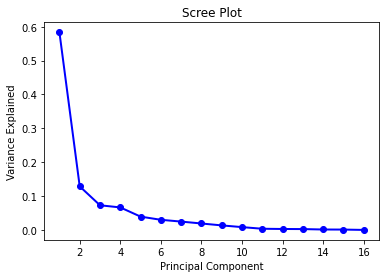

In [9]:
# scree plot

plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, 'bo-', linewidth=2)
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.title('Scree Plot')
plt.show() 

## Scree Plot based extraction  

As per the Analysis of the elbow we can see that it starts plateau at 4 to 11 after which remains similar